In [53]:
import numpy as np
import pandas as pd
import os
import csv
from matplotlib import pyplot as plt
import scipy.stats as st
import seaborn as sns 

In [54]:
file = 'constituents-financials_csv.csv'
file_path = os.path.join("data", "constituents-financials_csv.csv")
spreadsheet = pd.read_csv(file_path)

In [55]:
spreadsheet.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [56]:
narrowspreadsheet = spreadsheet[['Name', 'Sector', 'Market Cap']]

narrowspreadsheet

,Name,Sector,Market Cap
0,3M Company,Industrials,138721055226
1,A.O. Smith Corp,Industrials,10783419933
2,Abbott Laboratories,Health Care,102121042306
3,AbbVie Inc.,Health Care,181386347059
4,Accenture plc,Information Technology,98765855553
...,...,...,...
500,Xylem Inc.,Industrials,12915021000
501,Yum! Brands Inc,Consumer Discretionary,27003303098
502,Zimmer Biomet Holdings,Health Care,24454698119
503,Zions Bancorp,Financials,10670678640


In [57]:
top10 = narrowspreadsheet[['Name', 'Sector', 'Market Cap']]
top_10_sectors = narrowspreadsheet.groupby('Sector').agg({'Name': 'first', 'Market Cap': 'sum'}).nlargest(10, 'Market Cap')

print(top_10_sectors)

                                                       Name     Market Cap
Sector                                                                    
Information Technology                        Accenture plc  6727121800912
Financials                    Affiliated Managers Group Inc  3442649464852
Health Care                             Abbott Laboratories  3244359043367
Consumer Discretionary                   Advance Auto Parts  3213562747315
Industrials                                      3M Company  2411541173034
Consumer Staples                           Altria Group Inc  2087076388082
Energy                              Anadarko Petroleum Corp  1357313712749
Materials                      Air Products & Chemicals Inc   692300259151
Real Estate             Alexandria Real Estate Equities Inc   625315677562
Utilities                                          AES Corp   611632638471


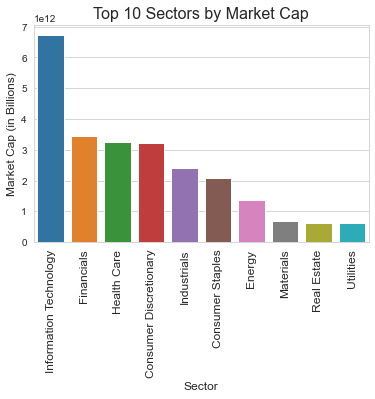

In [58]:
sns.set_style("whitegrid")
top_10_sectors = narrowspreadsheet.groupby('Sector').sum().nlargest(10, 'Market Cap')
sns.barplot(x=top_10_sectors.index, y='Market Cap', data=top_10_sectors)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Market Cap (in Billions)", fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.title("Top 10 Sectors by Market Cap", fontsize=16)
plt.show()

In [59]:
dividend_yield = spreadsheet

dividend_yield

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [60]:
dividend = dividend_yield.groupby('Sector')['Dividend Yield'].mean()


In [61]:
dividend.sort_values(ascending=False, inplace=True)

In [62]:
print(dividend)


Sector
Telecommunication Services    7.567797
Real Estate                   3.894758
Utilities                     3.759224
Consumer Staples              2.433391
Financials                    2.017241
Energy                        2.014452
Materials                     1.737976
Consumer Discretionary        1.572412
Industrials                   1.479392
Information Technology        1.228494
Health Care                   0.917243
Name: Dividend Yield, dtype: float64


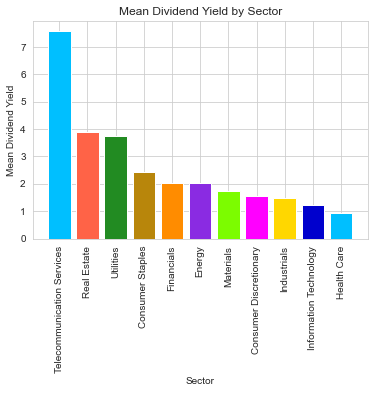

In [63]:
# Create a bar plot using seaborn

colors = ['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange','blueviolet', 'lawngreen', 'magenta', 'gold' ,'mediumblue']


fig, ax = plt.subplots()

ax.bar(dividend.keys(), dividend.values, color=colors)

plt.title('Mean Dividend Yield by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Dividend Yield')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


In [64]:

price_to_book = spreadsheet.groupby('Sector')['Price/Book'].mean()


In [65]:
price_to_book.sort_values(ascending=False, inplace=True)


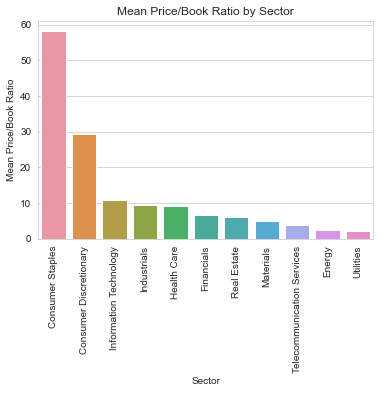

In [66]:
sns.barplot(x=price_to_book.index, y=price_to_book.values)

plt.title('Mean Price/Book Ratio by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Price/Book Ratio')
plt.xticks(rotation=90)

plt.show()


In [67]:
spreadsheet

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


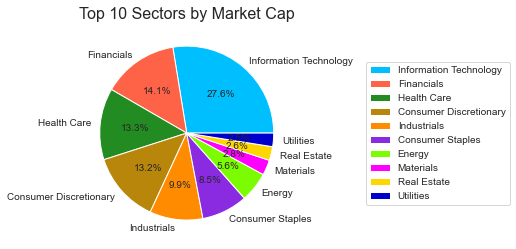

In [71]:
color = ['deepskyblue', 'tomato', 'forestgreen', 'darkgoldenrod', 'darkorange', 'blueviolet', 'lawngreen', 'magenta', 'gold' ,'mediumblue']

top_10_sectors = narrowspreadsheet.groupby('Sector').sum().nlargest(10, 'Market Cap')
top_10_sectors_sum = top_10_sectors['Market Cap'].sum()
top_10_sectors['Percentage'] = top_10_sectors['Market Cap'] / top_10_sectors_sum * 100
top_10_sectors = top_10_sectors.reset_index()

fig, ax = plt.subplots()
ax.pie(top_10_sectors['Percentage'], labels=top_10_sectors['Sector'], autopct='%1.1f%%', colors=color)
plt.title("Top 10 Sectors by Market Cap", fontsize=16)
ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.5), labels=top_10_sectors['Sector'])
plt.show()